<a href="https://colab.research.google.com/github/Vijaysiraw/new/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

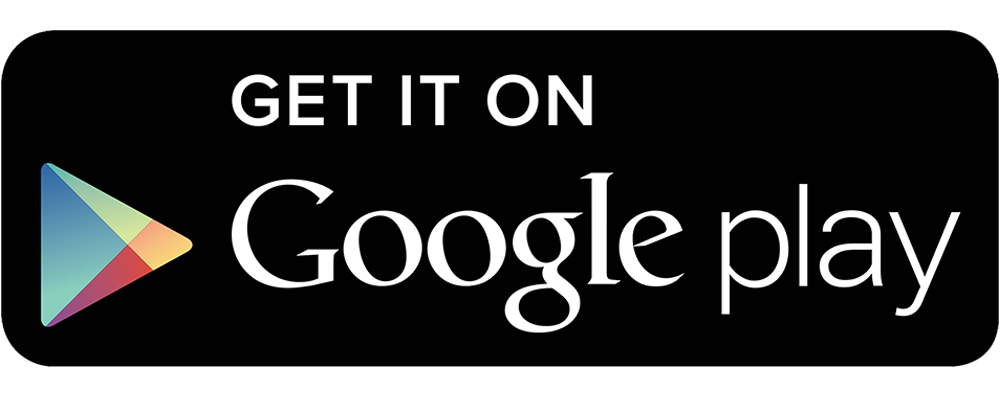

###The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.Explore and analyze the data to discover key factors responsible for app engagement and success

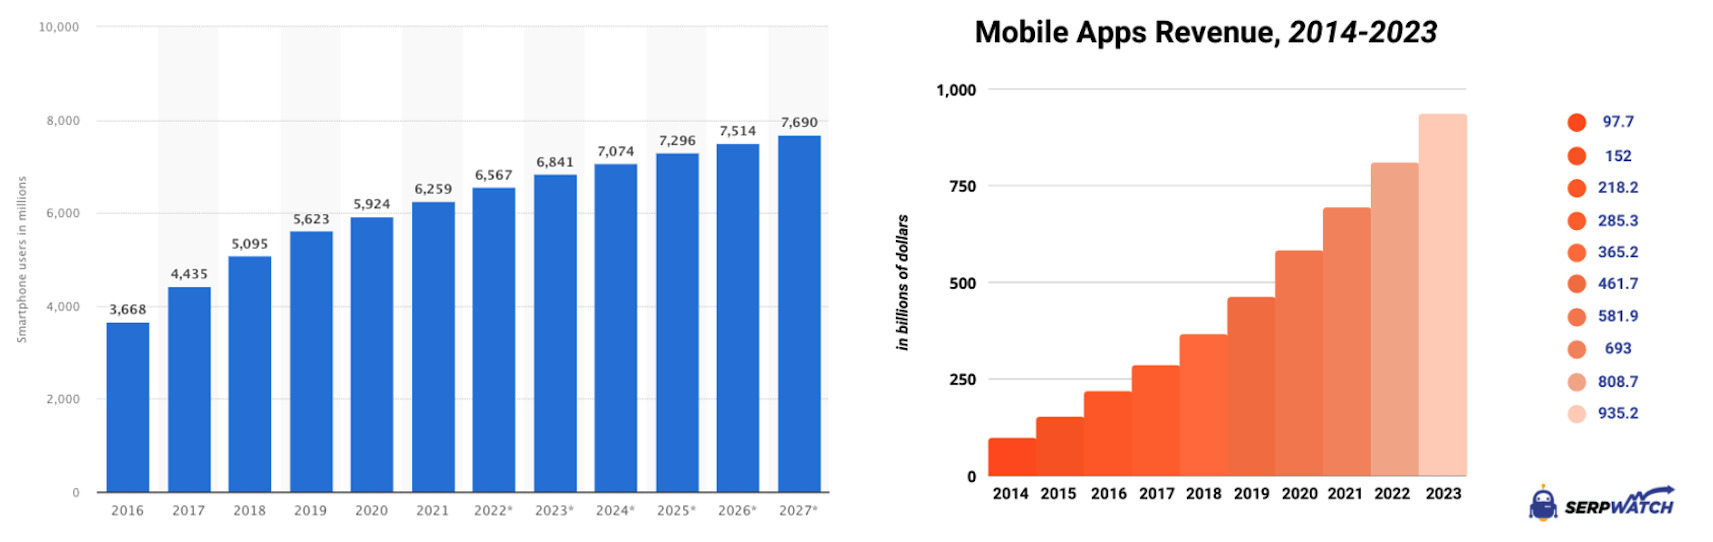

#  **Problem statement**
#Play store data
1. What are the most popular categories on the Google Play Store?
2. What are the top 10 genres in the Play Store data?
3. What is the ratio of paid and free apps?
4. Analysis of the ratings of the top 5 categories
5. Which age group has the most applications?
6. What is the average app size of paid and free apps?
7. How are installs affected by reviews and ratings?
8. Which price segment is most popular among paid apps?
9. Most downloaded paid apps and their price
10. Which are the top 10 apps in the Game category?
11. Which is the most popular genre in in game category?
12. What are the top 10 apps on the Google Play Store?
13. What is the correlation between the Play Store data?


#User review data
1. What is the ratio between positive and negative reviews?
2. What is the relation between sentiment plurality and sentiment subjectivity?
3. Find out which apps have the most positive and negative reviews in the dataset.
4. What is the sentiment polarity of the top apps?
5. How does sentiment polarity affect the rating?



In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from importlib import reload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
file_path='/content/drive/MyDrive/Colab Notebooks/play_store_EDA/Play Store Data.csv'
file_path2='/content/drive/MyDrive/Colab Notebooks/play_store_EDA/User Reviews.csv'

In [ ]:
#upload play store data
play_data=pd.read_csv(file_path)

In [ ]:
#brief analysis
play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Information of play store data
###In this dataset we have 10841 Rows and 13 columns.and these columns are-

* App:- Display the name of the application in this column.
* Category:-It displays the app's category.
* Rating:-Average rating of app(0-5)
* Reviews:- It shows the total number of user reviews for the application.
* Size:- It displays the application's size.
* Installs:- It shows the total number of downloads.
* Type:- It shows whether the app is free to use or paid.
* Price:- It shows the price of a paid app (in dollars).
* Content Rating: It shows which age group this application is for.
* Genres:- It shows the genre of the application.
* Last Updated:- It shows when the application was updated.
* Current Ver:- It shows the current version of the application.
* Android Ver: - It tells us about the Android version that can support the application.





In [ ]:
#info about the data
play_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Data cleaning part-1

#1.Handing NaN values and duplicate data
###in this part we remove duplicate data and handling the Null values

In [ ]:
#we have 1181 duplicate app in data set 
play_data['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

In [ ]:
#remove duplicates data in play store data
df=play_data.drop_duplicates(subset=['App'])

In [ ]:
#check null values in dataset
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# complete information of play store data
def info_of_data():
  info=pd.DataFrame(index=df.columns)
  info['total']=df.count()
  info['nun_value']=df.isna().sum()
  info['persent']=df.isna().mean()*100
  info['unique']=df.nunique()
  return info
info_of_data()

,total,nun_value,persent,unique
App,9660,0,0.000000,9660
Category,9660,0,0.000000,34
Rating,8197,1463,15.144928,40
Reviews,9660,0,0.000000,5331
Size,9660,0,0.000000,462
Installs,9660,0,0.000000,22
Type,9659,1,0.010352,3
Price,9660,0,0.000000,93
Content Rating,9659,1,0.010352,6
Genres,9660,0,0.000000,119


#Handling the NaN values in Play store data

1.   Type :- 1 NaN value in this columns
2.   Content Rating :- 1 nan value in this columns
3.   current Ver :- 8 NaN values in this columns
4.   Android Var :- 3 NaN values in this columns
5.   Rating :- 1465 NaN values in this columns









## 1. Type,Content Rating,Current Ver,Android Var
####We have 13 null values in Type,Content rating,current version, and Android var. This represents 0.12% of the total data. Therefore, we can remove these rows since they will not affect the final result.

In [ ]:
# drop the null values  
df=df.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'])

In [ ]:
#check null values
df.isna().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

#Rating data handling

*   The rating column has 1470 NaN values which are approximately 14% of the entire data. if we drop these rows we lose a large amount of data . which may impact the final product
*   we fill NaN value according to installstion of apps



In [ ]:
#check the NaN value rating in dataframe
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
#create new dataframe with no NaN values(for Rating)
clean_df=df[~df['Rating'].isna()]

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


In [ ]:
#we create a dictionary that will contian the installation and avg rating data
avg_rating=dict(round(clean_df.groupby('Installs')['Rating'].mean(),1))
print(avg_rating)

{'1+': 5.0, '1,000+': 4.1, '1,000,000+': 4.2, '1,000,000,000+': 4.2, '10+': 4.6, '10,000+': 4.0, '10,000,000+': 4.3, '100+': 4.4, '100,000+': 4.1, '100,000,000+': 4.4, '5+': 4.6, '5,000+': 4.0, '5,000,000+': 4.2, '50+': 4.4, '50,000+': 4.0, '50,000,000+': 4.3, '500+': 4.2, '500,000+': 4.2, '500,000,000+': 4.4}


In [ ]:
#add '0+' installation data in dictionary
avg_rating['0+']=0

In [ ]:
#this function returns the average rating according to number of installs app
def fill_rating(x):
  return avg_rating[x]

In [ ]:
#fill null values
df['Rating'].fillna(df['Installs'].apply(fill_rating),inplace=True)

In [ ]:
#finally we fill the nan values in dataset
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


####finally we have 9648 rows and 13 columns after removing null values and duplicate data

#Data cleaning part-2

*   in this section we will convert data into correct form

In [ ]:
#check data type of each columns
df.dtypes.reset_index().rename(columns={'index':'Name',0:'type'})

,Name,type
0,App,object
1,Category,object
2,Rating,float64
3,Reviews,object
4,Size,object
5,Installs,object
6,Type,object
7,Price,object
8,Content Rating,object
9,Genres,object


##1.Reviews column
*   convert string data type into integer data type.

In [ ]:
#checking data type in review column
df.loc[0,'Reviews']

'159'

In [ ]:
#so we convert string data type into integer data type with help 'eval' method
df['Reviews']=df['Reviews'].apply(lambda x: eval(x))

In [ ]:
#check data type
df['Reviews'].dtypes

dtype('int64')

##2.Size
* The dataset's app size is a string data type.So we will convert this data into an integer.
* The size column contains data in different units. M stands for MB, and K stands for KB. So we will convert these data to single. We will convert the data into MB.
* MB = 1024 KB, so we must divide the value by 1024.
* Remove unit size and convert to an integer data type.

In [ ]:
#checking data type and data form
df['Size'].value_counts()

Varies with device    1226
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [ ]:
df[df['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [ ]:
#this fuction convert 'Size' data into float data type
def convert_size_data(x):
  if 'M'==x[-1]:
    return float(x[:-1])
  elif 'K'==x[-1]:
    return round(float(x[:-1])/1024,3)
  else:
    return 'NaN'


In [ ]:
#clean the data and convert data type
df['Size']=df['Size'].apply(convert_size_data)
df['Size']=df['Size'].apply(lambda x: float(x))

In [ ]:
#check data type of Size column
df['Size'].dtypes

dtype('float64')

#3.installs column :-

* We can see in this column that the data is of the string data type. but we need an integer data type for calculation. So we convert this data into an integer data type.
* given data, ex. 200+' , so we first remove the + sign after we convert data into an integer.



In [ ]:
#this function convert data in integer datatype
def convert_installs_data(x):
  if '+'==x[-1]:
    return int(x[:-1].replace(',',''))
  else:
    return int(x)


In [ ]:
#convert data type of Installs column
df['Installs']=df['Installs'].apply(convert_installs_data)

In [ ]:
#check installs data
df.loc[4,'Installs']

100000

#4.Price column :-
*   In this column, data is presented in string form and with the dollar symbol. so we must first drop the $ symbol from all the values. then we will convert the float data type.


In [ ]:
#this function convert string price into float datatype
def convert_price_data(x):
  if '$'==x[0]:
    return float(x[1:])
  else:
    return float(x)

In [ ]:
#convert string datatype(ex:-'$2.50') into float datatype(ex- 2.50)
df['Price']=df['Price'].apply(convert_price_data)

In [ ]:
#finally chack datatype
df['Price'].dtypes

dtype('float64')

In [ ]:
# finally we have clean data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            8112 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1536
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,8112.000000,9.648000e+03,9648.000000
mean,4.199948,2.168369e+05,21.176787,7.786211e+06,1.100193
std,0.533206,1.832349e+06,21.888109,5.378830e+07,16.861727
min,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.100000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,13.000000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#Analysis and Visualization

#1.What are the most popular categories on the Google Play Store ?
In this case, we discuss two major topics.
1. Which category has the most apps in the Play Store?
2. Which category has the most number of installations?


###1.Which category has the most apps in the Play Store?

In [ ]:
#Number of apps in each category
find_top_category=df.groupby('Category')['App'].count()
find_top_category

Category
ART_AND_DESIGN           63
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     221
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1828
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       83
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         374
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   825
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
Name: App, dtype: int64

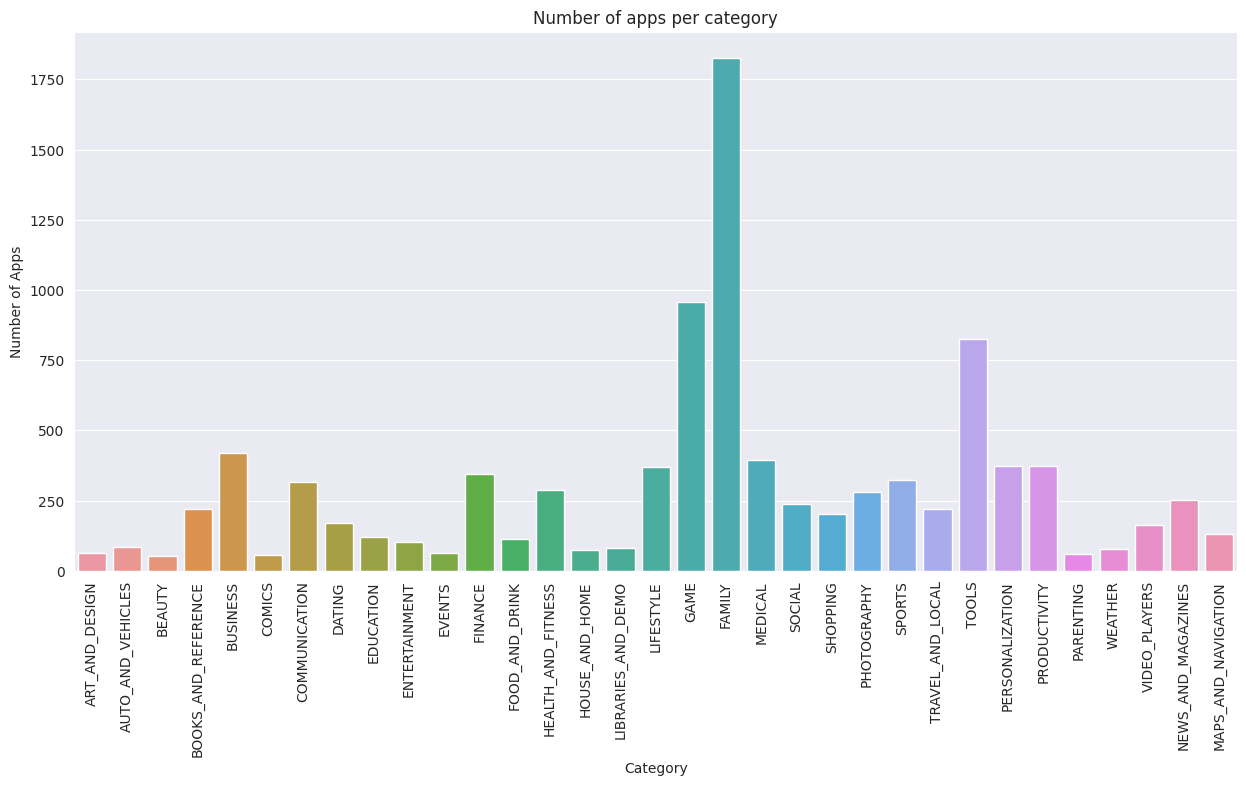

In [ ]:
#we are using countplot for find number of apps available in each category
plt=reload(plt)
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
sns.countplot(x='Category', data=df)
plt.title("Number of apps per category")
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

####In conclusion, we can say that the majority of apps on the Google Play Store are in the categories of family, games, tools, and so forth

###2. Which category has the most number of installations?

In [ ]:
#Number of installation in each category
installs_category=round((df.groupby(['Category'])['Installs'].sum()/1000000000).reset_index(),2)

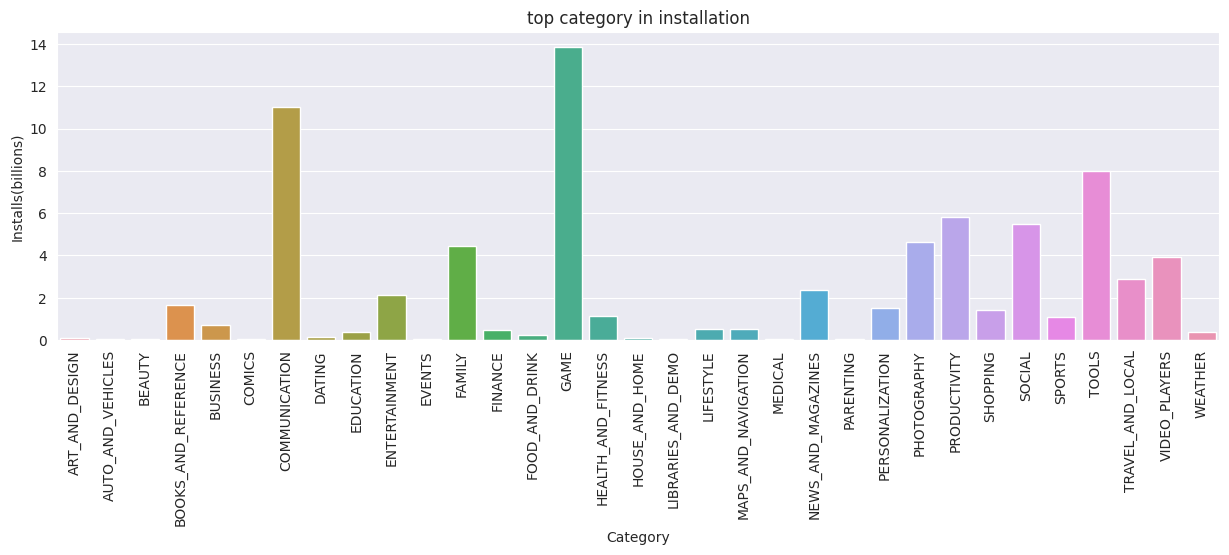

In [ ]:
#numbers of downloads in each category
plt.figure(figsize=(15,4))
sns.barplot(x='Category',y='Installs',data=installs_category)
plt.title('top category in installation')
plt.xticks(rotation=90)
plt.ylabel('Installs(billions)')
plt.show()

####According to the data on downloads in each category, it is clear that games, communication, and tools have the highest amount of downloads. However, the family category does not have nearly as many users as the aforementioned categories. This could be due to a variety of factors, such as the lack of available family-oriented apps, or the fact that such apps are not as popular as games, communication, and tools. It could also be that the family category doesn't appeal to the same groups of people that the other categories do. Whatever the reason, it is clear that the family category has not achieved the same level of success as the other categories.

#2.What are the top 10 genres in the play store data?

In [ ]:
#sort the data according to genres
top_10_gen=round((df.groupby('Genres')['Installs'].sum()/1000000000).sort_values(ascending=False).reset_index().head(10),2)

In [ ]:
top_10_gen

,Genres,Installs
0,Communication,11.04
1,Tools,7.99
2,Productivity,5.79
3,Social,5.49
4,Photography,4.65
5,Video Players & Editors,3.92
6,Arcade,3.76
7,Action,3.48
8,Casual,3.05
9,Entertainment,3.01


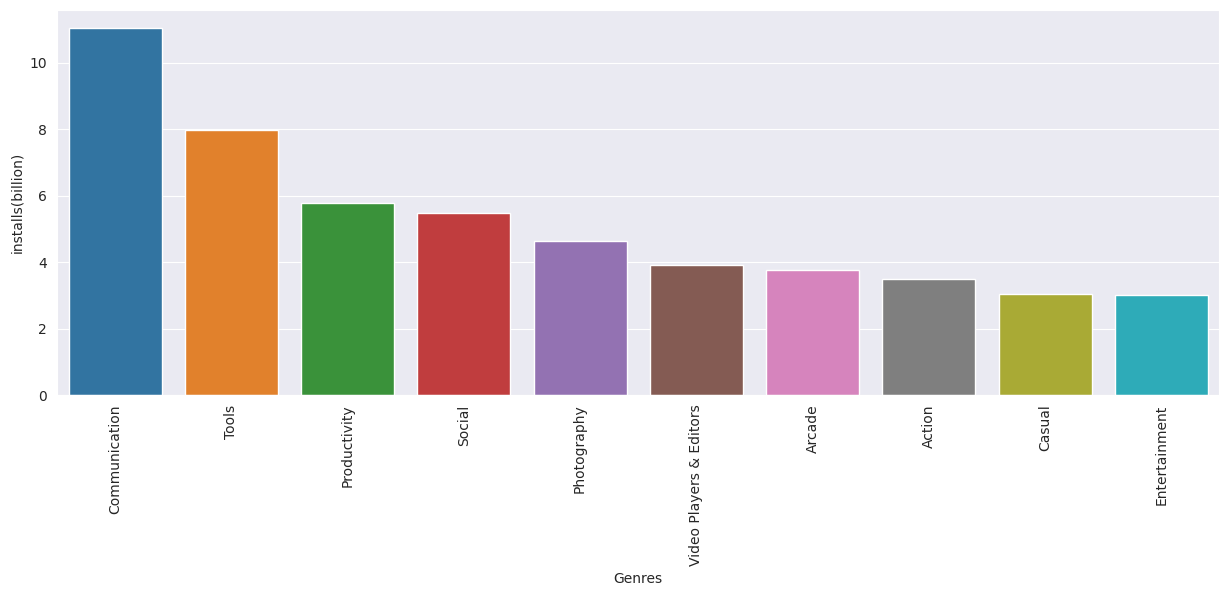

In [ ]:
#check top 10 genres in play store data
plt.figure(figsize=(15,5))
sns.barplot(x='Genres',y='Installs',data=top_10_gen)
plt.ylabel('installs(billion)')
plt.xticks(rotation=90)
plt.show()

#3.What is the ratio of paid and free apps ?
*   we have two type of data in 'Type' column free and paid
*   we are using pie plot to find the weightage of free and paid apps


In [ ]:
#calculate data for pie plot
data=df['Type'].value_counts()
labels=df['Type'].unique()

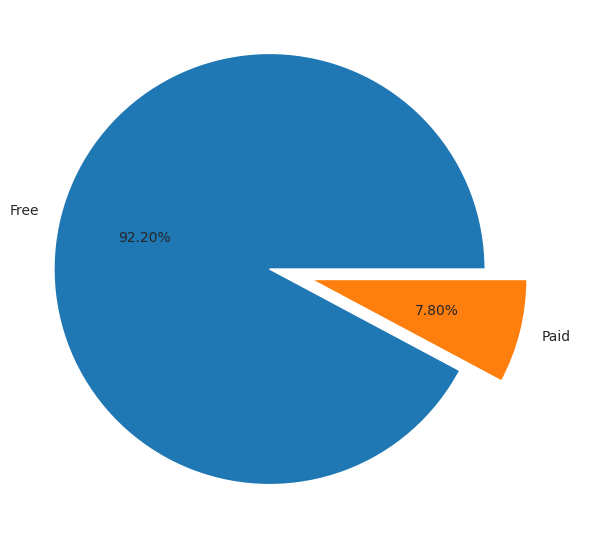

In [ ]:
#plot graph using data and labels
plt.figure(figsize=(17,7))
plt.pie(data,labels=labels,explode=(0.2,0),autopct='%1.2f%%')
plt.title=('Free and Paid apps')
plt.show()

In [ ]:
#filter out paid and free apps
apps_installs=df.groupby('Type')["Installs"].sum()
apps_installs

Type
Free    75064046546
Paid       57313871
Name: Installs, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

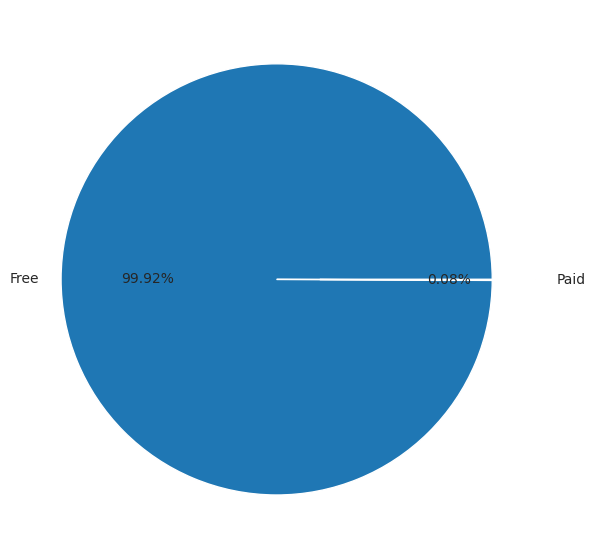

In [ ]:
#installs
plt.figure(figsize=(17,7))
plt.pie(apps_installs,labels=labels,explode=(0.2,0),autopct="%1.2f%%")
plt.title=('paid and free apps')
plt.show

####In both pie plot we can say that most of user preference free apps

#4.Analysis of the rating of the top 5 categories

In [ ]:
#number of installation per category
top_category=df.groupby(['Category'])['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False).head()

In [ ]:
#list of top 5 categories
top_list=list(top_category['Category'])
top_list

['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

In [ ]:
#filter the top 5 categories data
top_category_data=df[df['Category'].isin(top_list)]

In [ ]:
top_category_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257,17.0,10000000,Free,0.0,Teen,Communication,"June 6, 2018",1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,NaN,100000000,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up


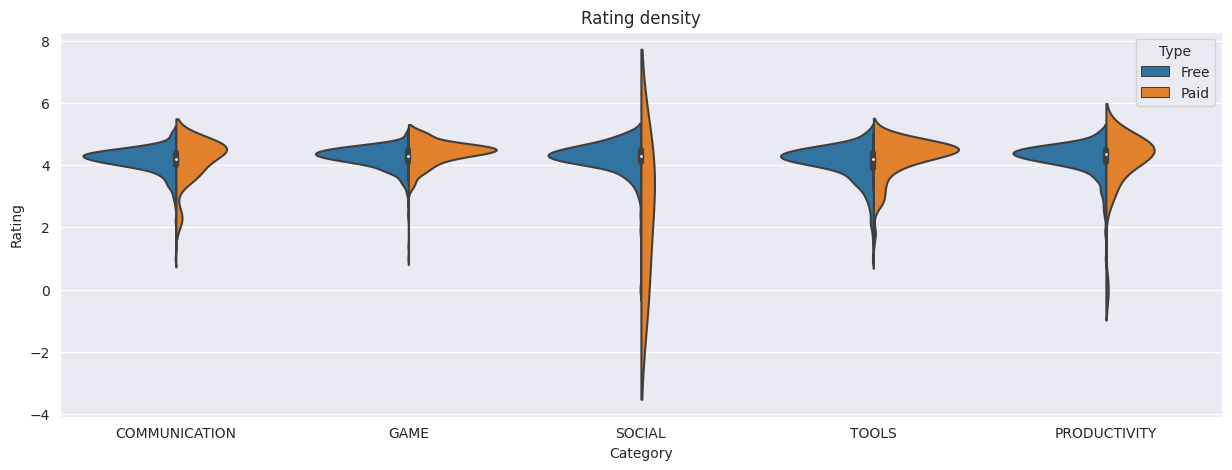

In [ ]:
#analysis the data in violin plot
plt=reload(plt)
plt.figure(figsize=(15,5))
sns.violinplot(x='Category',y='Rating',data=top_category_data,hue=df['Type'],split=True)
plt.title('Rating density')
plt.show()

####In this plot, we can clearly see that most apps receive a rating of four or five. However, paid apps in the social category do not receive the same rating.

#5.Which age group has the most applications?

In [ ]:
#collect content rating data
d1=df['Content Rating'].value_counts()
l1=list(df['Content Rating'].unique())

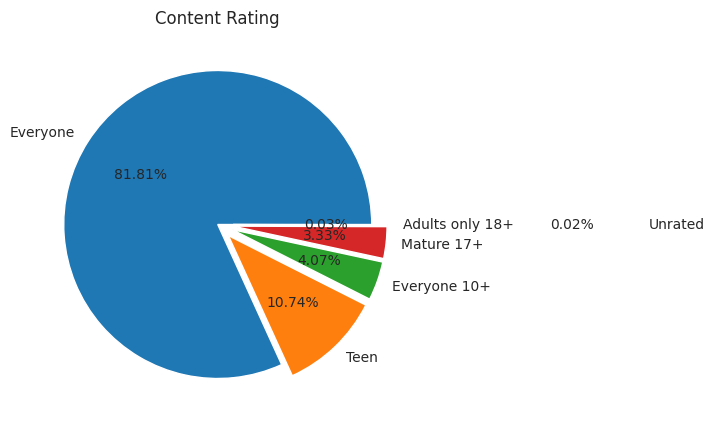

In [ ]:
#plot the data in pie plot
plt=reload(plt)
plt.figure(figsize=(15,5))
plt.pie(d1,labels=l1,explode=(0,0.1,0.1,0.1,0.1,1.7),autopct='%1.2f%%')
plt.title('Content Rating')
plt.show()

#### so in this plot we clearly see that 81.81% apps for everyone and 10.74% for teen

In [ ]:
#number of installs
dd=df.groupby('Content Rating')['Installs'].sum()

In [ ]:
#check the data
dd.head()

Content Rating
Adults only 18+        2000000
Everyone           52177775851
Everyone 10+        4016271795
Mature 17+          2437986878
Teen               16487275393
Name: Installs, dtype: int64

In [ ]:
#label of pie plot
dd.index

Index(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen',
       'Unrated'],
      dtype='object', name='Content Rating')

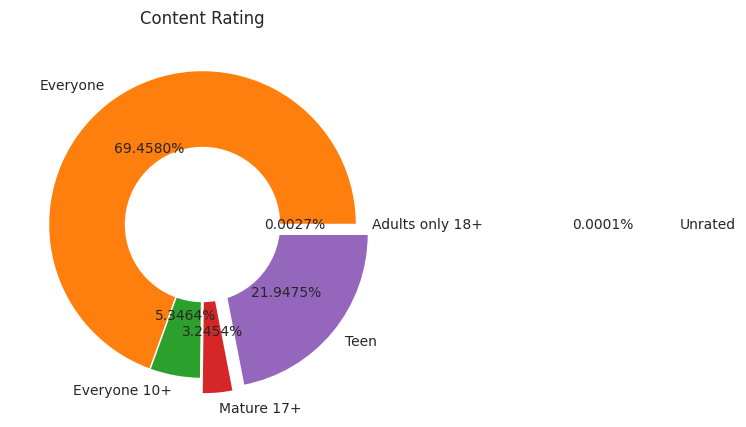

In [ ]:
#check the percentage of each content
plt=reload(plt)
plt.figure(figsize=(15,5))
plt.pie(dd,labels=dd.index,explode=(0,0,0,0.1,0.1,2.0),autopct='%1.4f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white') 
p=plt.gcf() 
p.gca().add_artist(my_circle)
plt.title('Content Rating')
plt.show()

#6.What is the average app size of paid and free apps?

<Axes: xlabel='Size', ylabel='Density'>

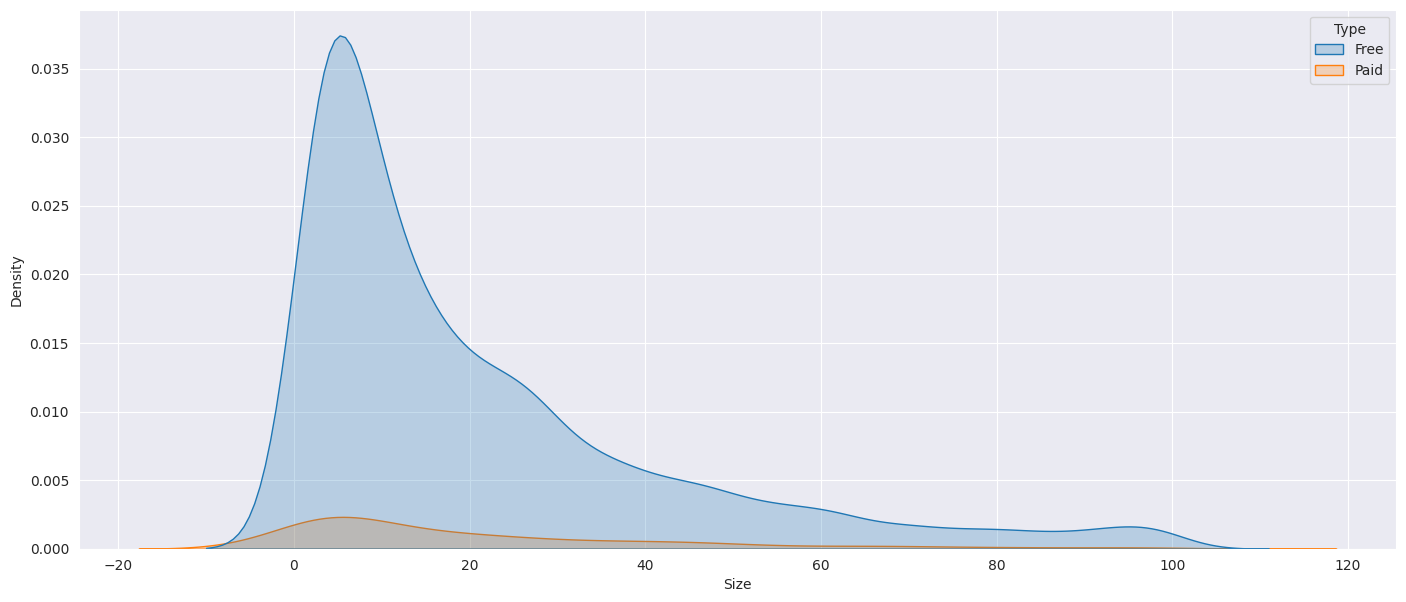

In [ ]:
#check density of app size
plt.figure(figsize=(17,7))
sns.kdeplot(x='Size',hue='Type',data=df,fill=True)

#7.How are Installs affected by Reviews and Rating ?

<Axes: xlabel='Installs', ylabel='Rating'>

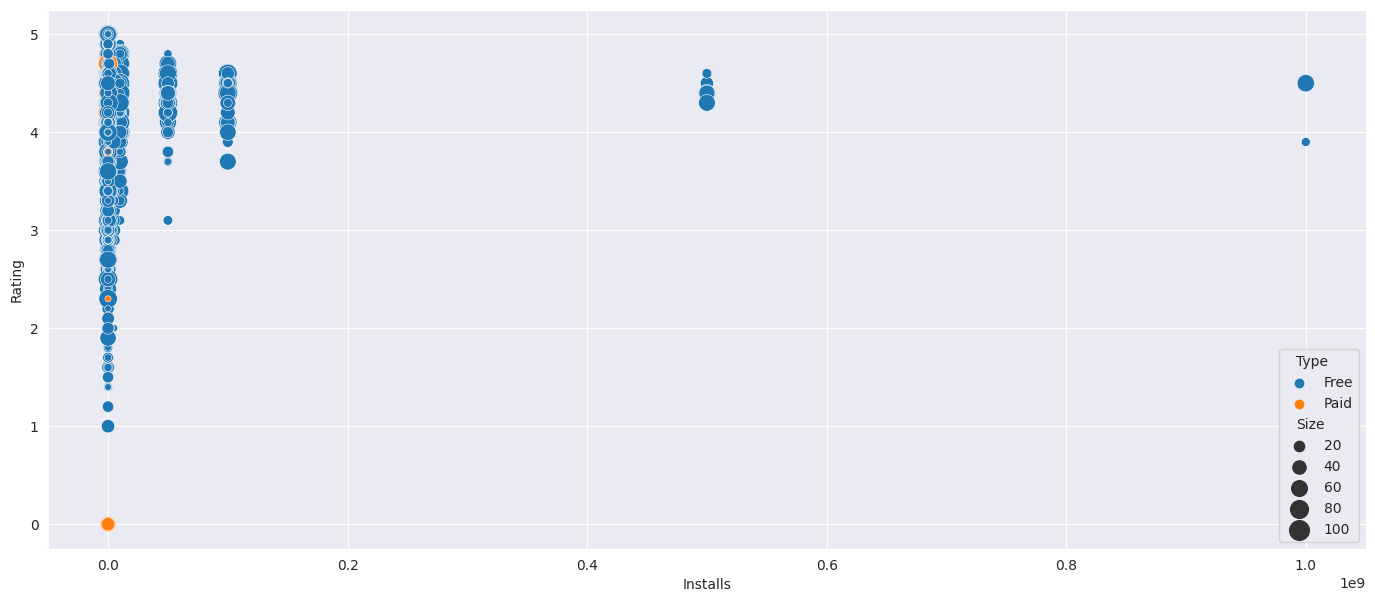

In [ ]:
#check relation between rating and installs data
plt.figure(figsize=(17,7))
sns.scatterplot(x='Installs',y='Rating',data=df,hue='Type',size='Size',sizes=(20,200))

####Based on this scatter plot, we can see that applications with more than 100 million downloads have a rating of 3.5 or higher.

<Axes: xlabel='Reviews', ylabel='Installs'>

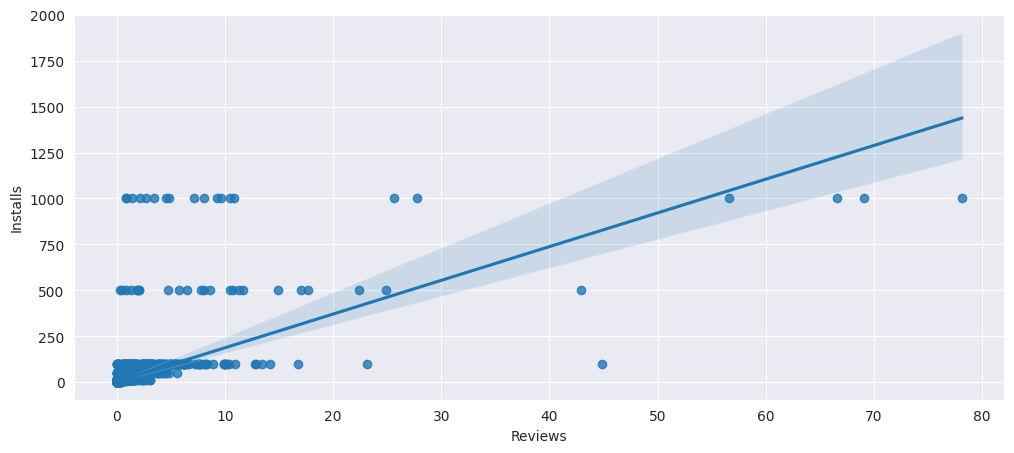

In [ ]:
#relation between 'Installs' and 'Reviews'
plt.figure(figsize=(12,5))
sns.regplot(x=df['Reviews']/1000000,y=df['Installs']/1000000,data=df)

#### We can clearly see that there is a positive correlation between 'Installs' and 'Reviews'. This means that as the number of reviews increases the number of installs also increases.

#8.Which price segment is most popular among paid apps ?

In [ ]:
#filter only paid apps
paid_apps=df[df['Type']=='Paid']

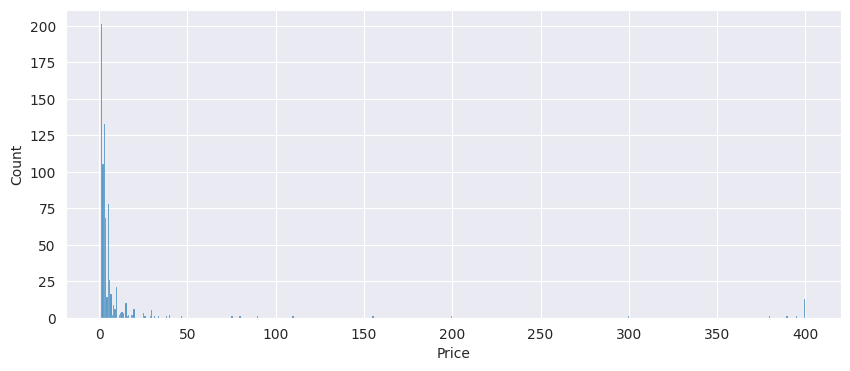

In [ ]:
#check paid apps density
plt.figure(figsize=(10,4))
sns.histplot(paid_apps['Price'])
plt.show()

#9.Most downloaded paid apps and there price

In [ ]:
#sort the data in descending order and get most downloaded paid apps
top_10_paid_apps=paid_apps.sort_values(by='Installs',ascending=False).head(10)

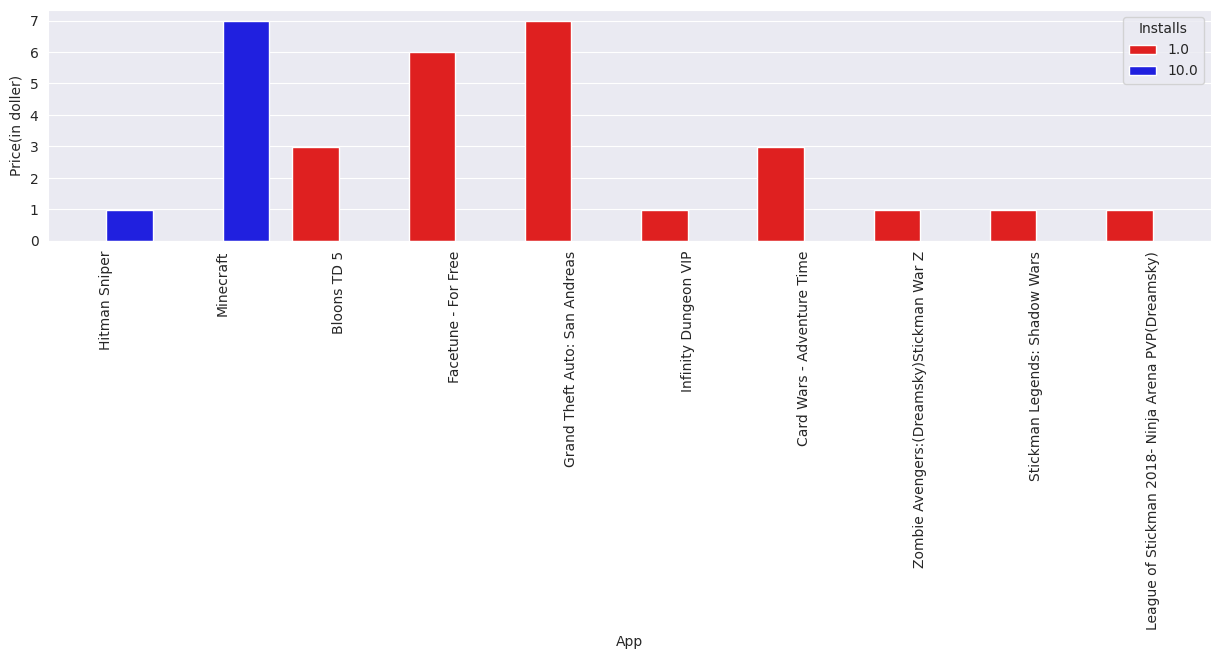

In [ ]:
#check top paid apps
plt.figure(figsize=(15,3))
sns.barplot(x='App',y='Price',hue=top_10_paid_apps['Installs']/1000000,data=top_10_paid_apps,palette=['red','blue'])
plt.xticks(rotation=90)
plt.ylabel('Price(in doller)')
plt.show()

####In this plot, we show the most downloaded paid apps and their prices. We can see that the highest number of installs for a paid app is 10 million. There are only two apps among the 10 million. These apps are Minecraft and Hitman Sniper, and the prices of these apps are 7 dollar and 1 dollar, respectively.

#10.Which are the top 10 apps in the Game category ?

In [ ]:
#filter out game data in dataset
top_games=df[df['Category']=='GAME'].sort_values(by='Installs',ascending=False).head(10)

In [ ]:
top_games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,NaN,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up


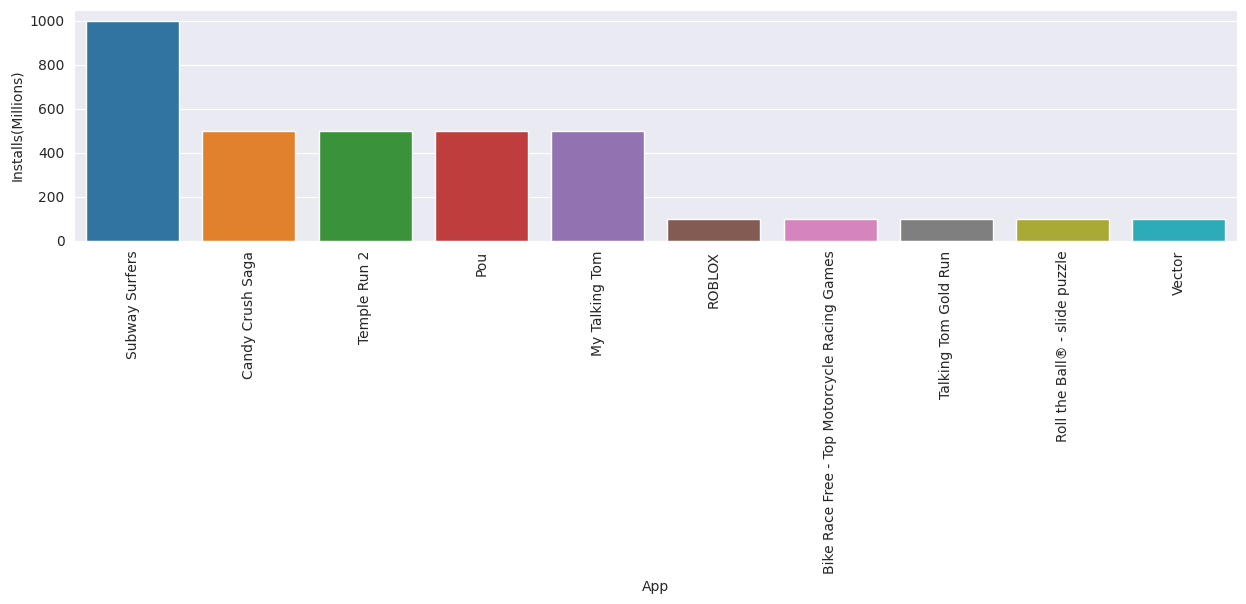

In [ ]:
#check top 10 games in dataset
plt.figure(figsize=(15,3))
sns.barplot(x='App',y=top_games['Installs']/1000000,data=top_games)
plt.ylabel('Installs(Millions)')
plt.xticks(rotation=90)
plt.show()

#11.Which are the most popular  genres  in game category?

In [ ]:
#filter out game data and groupby Genres data
game_data=df[df['Category']=='GAME'].groupby('Genres')['Installs'].sum().sort_values(ascending=False).reset_index()

In [ ]:
#top genres in game category
game_data.head()

,Genres,Installs
0,Arcade,3755129155
1,Action,3483039190
2,Casual,2139000000
3,Racing,1400247320
4,Puzzle,603200000


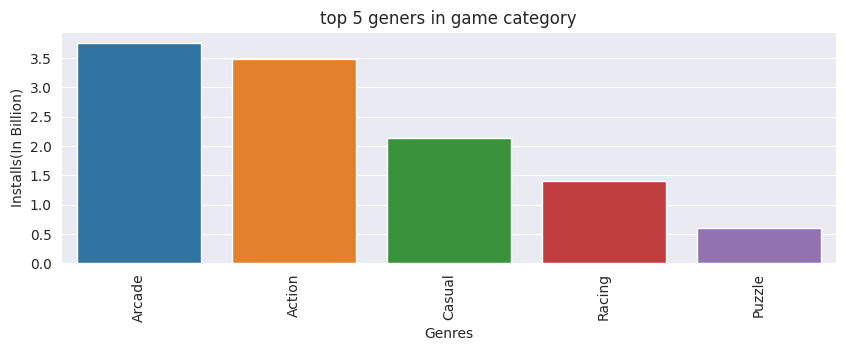

In [ ]:
#check which are the most populer genre among user
plt=reload(plt)
plt.figure(figsize=(10,3))
sns.barplot(x='Genres',y=game_data['Installs']/1000000000,data=game_data.head(5))
plt.title('top 5 geners in game category')
plt.ylabel('Installs(In Billion)')
plt.xticks(rotation=90)
plt.show()

#12.What are the top 10 apps on the google play store?

In [ ]:
#check most download apps
df['Installs'].value_counts()

1000000       1416
100000        1112
10000         1029
10000000       937
1000           886
100            709
5000000        607
500000         504
50000          468
5000           467
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

In [ ]:
#filter 1 billion download apps
top_10_apps=df[df['Installs']==1000000000].sort_values(by='Rating',ascending=False).head(20)

In [ ]:
top_10_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171,NaN,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device


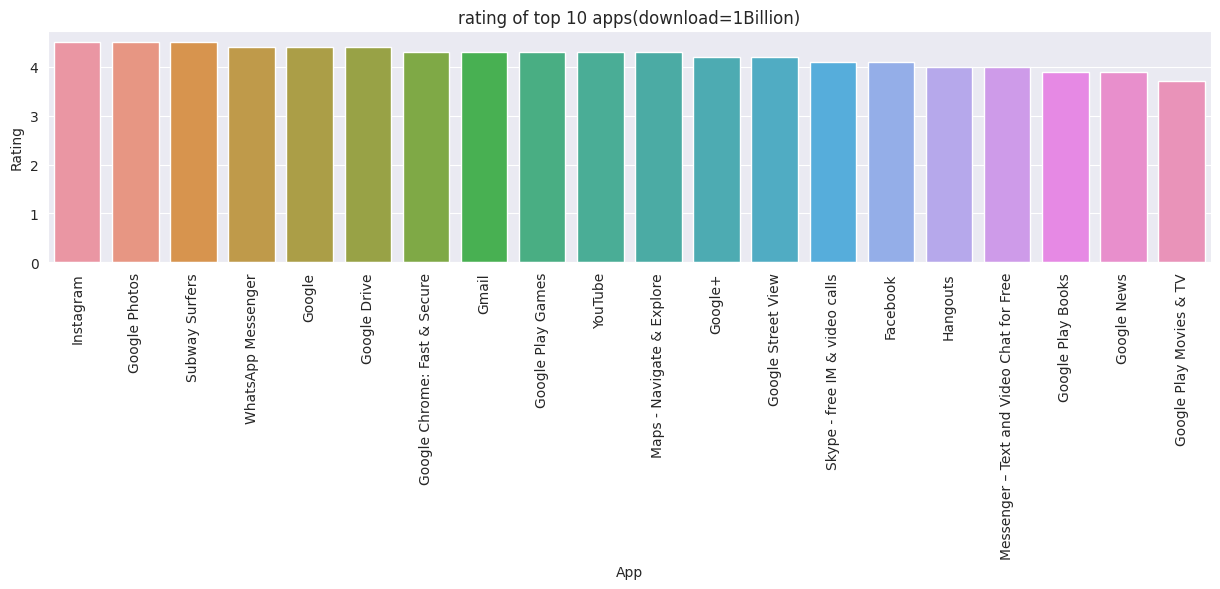

In [ ]:
#check rating of most download apps 
plt=reload(plt)
plt.figure(figsize=(15,3))
sns.barplot(x='App',y='Rating',data=top_10_apps)
plt.title('rating of top 10 apps(download=1Billion)')
plt.xticks(rotation=90)
plt.title=('top 10 apps')

In [ ]:
#filter out the top 10 apps
most_reviews=df.nlargest(10,'Reviews')

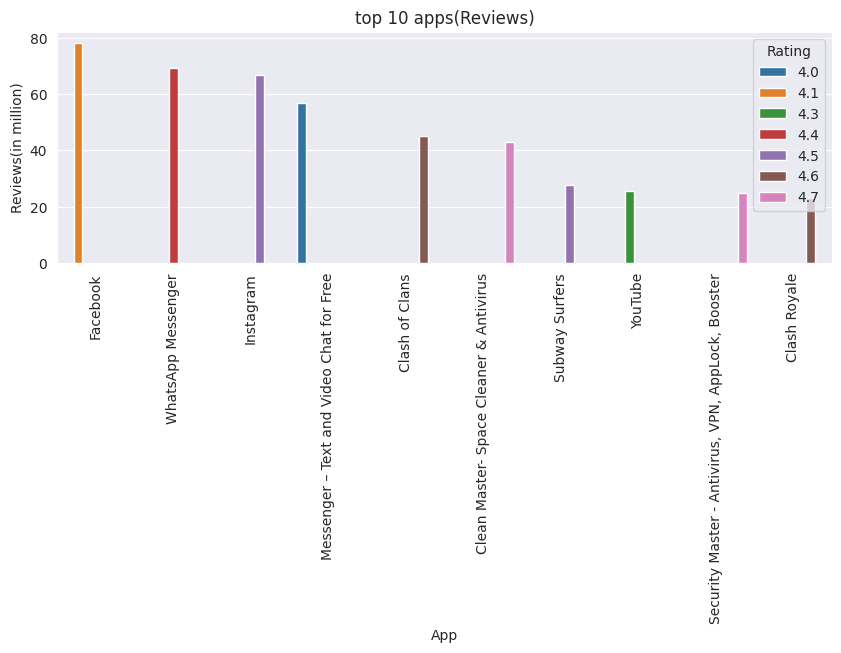

In [ ]:
#check the most reviewed apps 
plt=reload(plt)
plt.figure(figsize=(10,3))
sns.barplot(x='App',y=most_reviews['Reviews']/1000000,hue='Rating',data=most_reviews)
plt.title('top 10 apps(Reviews)')
plt.xticks(rotation=90)
plt.ylabel('Reviews(in million)')
plt.title=('top 10 apps')

#13.What is the correlation between play store data ?

In [ ]:
#correlation between data
df.corr()

<ipython-input-144-dc814d81fa33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.045101,0.032890,0.029916,-0.075189
Reviews,0.045101,1.000000,0.177868,0.625158,-0.007604
Size,0.032890,0.177868,1.000000,0.131685,-0.021943
Installs,0.029916,0.625158,0.131685,1.000000,-0.009413
Price,-0.075189,-0.007604,-0.021943,-0.009413,1.000000


<ipython-input-145-ab7b260682e8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


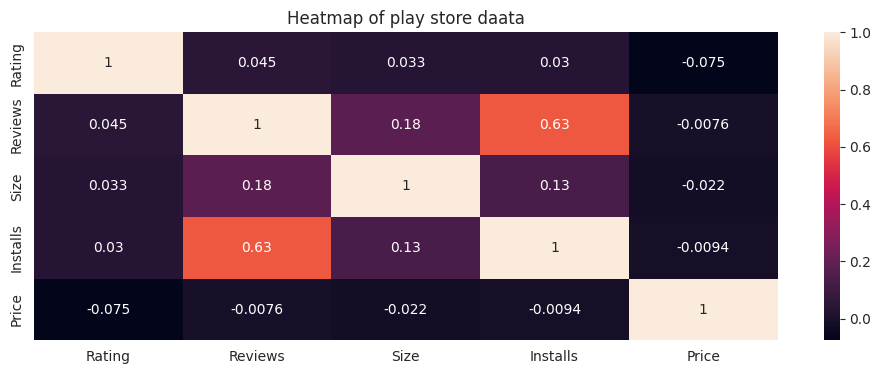

In [ ]:
#heatmap of play store data
plt=reload(plt)
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of play store daata')
plt.show()

#  user  reviews data

In [ ]:
#upload user reviews data
user_reviews=pd.read_csv(file_path2)

In [ ]:
#analysis user data
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### in this dataframe  has 64295 rows and 5 columns. The 5 columns are identified as follows: 
*   App :- Name of app
*   Translated_Review:- User reviews
*   Sentiment:-User views (positive, negative, and neutral)
*   Sentiment_Polarity:-User Experience (-1 to 1), +1 means a positive review, 0 means neutral, and -1 means a negative review.
*   Sentiment_Subjectivity :-user personal opinions (0 to 1).


In [ ]:
#brief information user reviews data
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#find out total number of null value in this dataset
user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### we can see that we have a lot of null values.so first check can we replace null value into meaningful value.

## we have null values are:
###Translated_Review         26868--(42%)
###Sentiment                 26863--(42%)
###Sentiment_Polarity        26863--(42%)
###Sentiment_Subjectivity    26863--(42%)


In [ ]:
#check null value tendency
user_reviews[user_reviews['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


####We can say that the apps that do not have reviews tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivit.
####We don't have efficient data with which we can fill these null values. So we drop all rows with null values, and then we analyse the data.


In [ ]:
#we remove all null value in data set
df2=user_reviews.dropna()

In [ ]:
#check dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
#check how many apps data in this dataset
df2['App'].value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

####we can see that we have  total 865 apps data available in this dataset

#1.What is the radio between positive and negative reviews

In [ ]:
#find out total reviews in each category
df2['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Text(0.5, 1.0, "Review's radio")

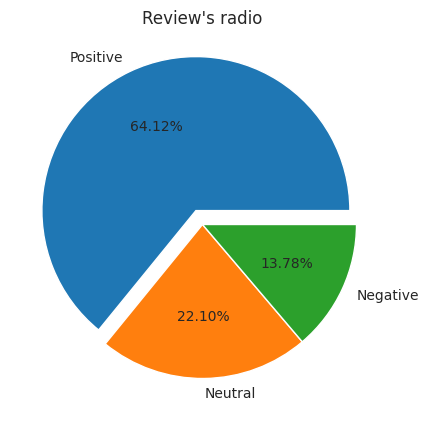

In [ ]:
#plot in pai chart
plt=reload(plt)
plt.figure(figsize=(15,5))
plt.pie(df2['Sentiment'].value_counts(),labels=df2['Sentiment'].unique(),explode=(0.1,0,0),autopct='%1.2f%%')
plt.title("Review's radio")

#Findings:
###1. Positive reviews are 64.12% 
###2. Negative reviews are 22.10% 
###3. Neutral reviews are 13.78%

#2.what is relation between the sentiment ploarity and sentiment subjectivity ?

<Axes: xlabel='Sentiment_Subjectivity', ylabel='Sentiment_Polarity'>

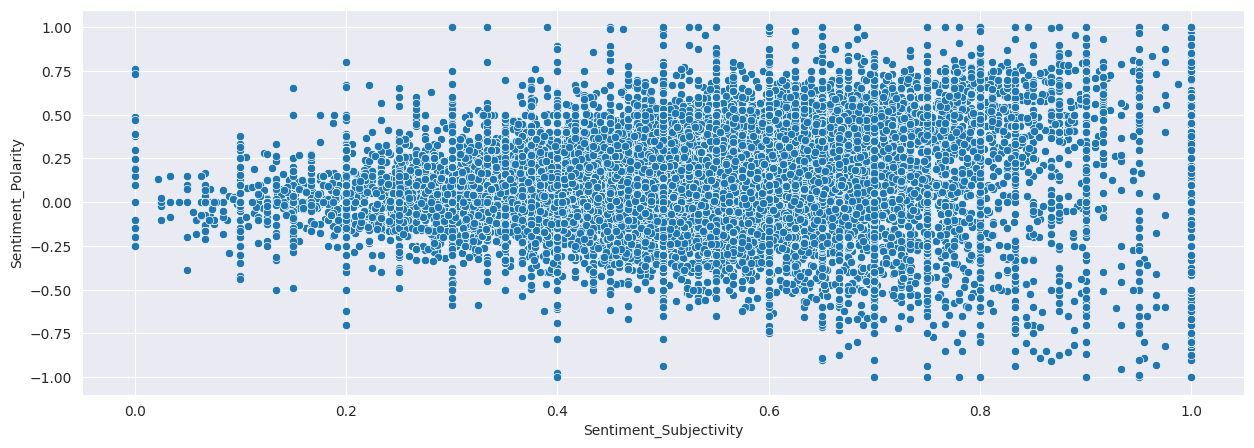

In [ ]:
#scatter plot between 'Sentiment_Polarity' and 'Sentiment_Subjectivity'
plt.figure(figsize=(15,5))
sns.scatterplot(y='Sentiment_Polarity',x='Sentiment_Subjectivity',data=df2)


#### In this scatter plot, we can clearly see that sentiment polarity is not always proportional to sentiment subjectivity. These are two different things, basically. :
####**Sentiment polarity**:- Basically, sentiment polarity shows user reviews in numerical form. Polarity is a floating-point value in the range [-1.0 to 1.0], where +1 means very positive, 0 means neutral, and -1 means very negative.
####**Sentiment subjectivity**:-Sentiment and subjectivity show personal views about the application. Subjectivity is a floating-point value in the range [0.0 to 1.0], where 0.0 is very objective and 1.0 is very subjective. 

#3.Find out which apps have the most positive and negative reviews in the dataset

In [ ]:
#count the sentiment and find out number of positive, negative and neutral reviews of each app
new=df2.groupby(['App','Sentiment'])['Sentiment'].count().unstack().rename_axis('App').reset_index()

In [ ]:
#check the dataset
new.head()

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,9.0,23.0
3,1800 Contacts - Lens Store,6.0,10.0,64.0
4,1LINE – One Line with One Touch,8.0,3.0,27.0


In [ ]:
#find out most positive and negative apps
top_positive_apps=new.sort_values(by='Positive',ascending=False).head(10)
top_negative_apps=new.sort_values(by='Negative',ascending=False).head(10)

<Figure size 1000x300 with 0 Axes>

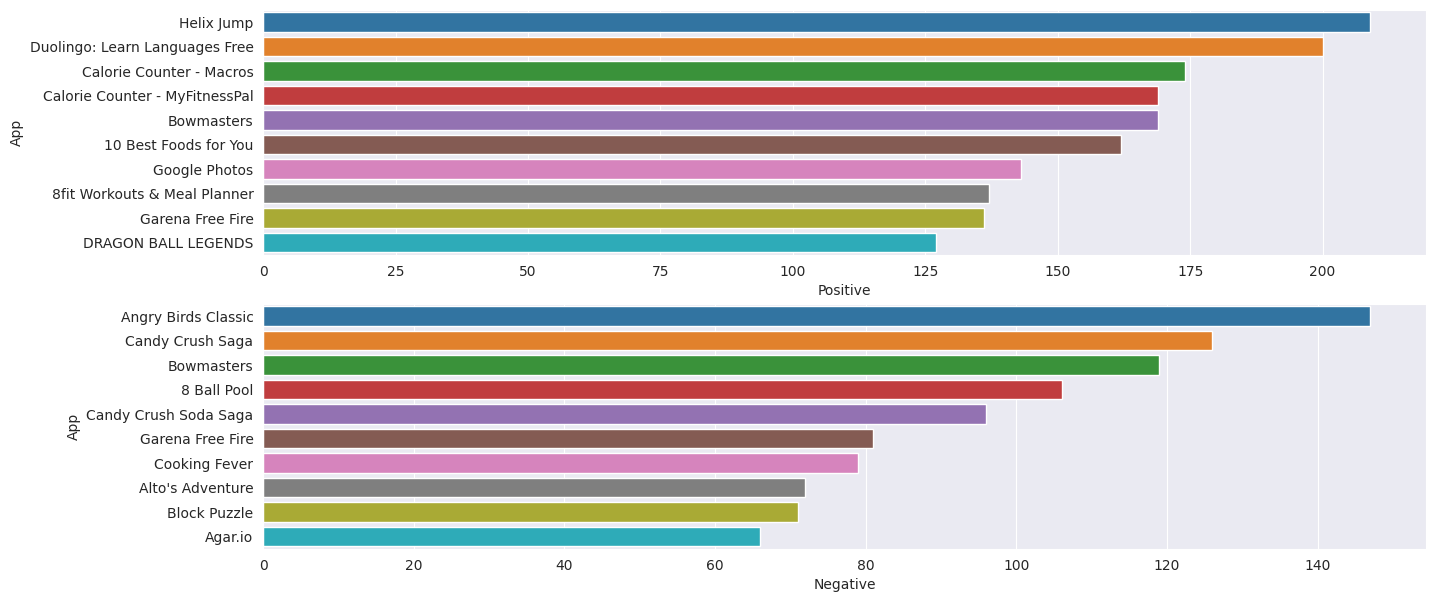

In [ ]:
# plot barplot and analysis the most positive and negative reviews apps
plt.figure(figsize=(10,3))
fig, ax = plt.subplots(2,1, figsize=(15,7))
sns.barplot(x='Positive',y='App',data=top_positive_apps,ax=ax[0])
sns.barplot(x='Negative',y='App',data=top_negative_apps,ax=ax[1])
plt.show()

#**4.What is  the sentiment polarity of the top apps ?**

In [ ]:
#filter duolingo app data
p1=df2.loc[df2['App']=='Duolingo: Learn Languages Free']
p2=df2.loc[df2['App']=='Helix Jump']
p3=df2.loc[df2['App']=='Calorie Counter - Macros']
n1=df2.loc[df2['App']=='Angry Birds Classic']
n2=df2.loc[df2['App']=='Candy Crush Saga']
n3=df2.loc[df2['App']=='8 Ball Pool']

<ipython-input-162-97b748f364e0>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)


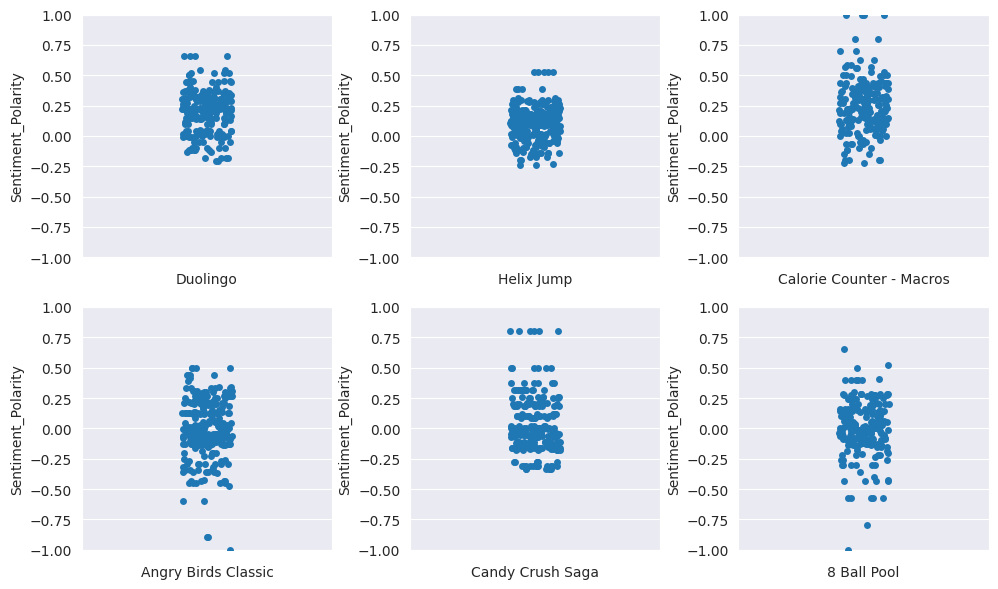

In [ ]:
#check polarity in strip plot
from pylab import *
fig, ax =plt.subplots(figsize=(10,6))
subplot(2,3,1)
sns.stripplot(y=p1['Sentiment_Polarity'])
plt.ylim(-1,1)
plt.xlabel('Duolingo')
subplot(2,3,2)
sns.stripplot(y=p2['Sentiment_Polarity'])
plt.ylim(-1,1)
plt.xlabel('Helix Jump')
subplot(2,3,3)
sns.stripplot(y=p3['Sentiment_Polarity'])
plt.ylim(-1,1)
plt.xlabel('Calorie Counter - Macros')
subplot(2,3,4)
sns.stripplot(y=n1['Sentiment_Polarity'])
plt.ylim(-1,1)
plt.xlabel('Angry Birds Classic')
subplot(2,3,5)
sns.stripplot(y=n2['Sentiment_Polarity'])
plt.ylim(-1,1)
plt.xlabel('Candy Crush Saga')
subplot(2,3,6)
sns.stripplot(y=n3['Sentiment_Polarity'])
plt.ylim(-1,1)
plt.xlabel('8 Ball Pool')
fig.tight_layout()
plt.show()

#### in these plot, we can seec that sentiment polarity of some apps and these polarity also effect the rating of apps

#**5.How does sentiment polarity affect the rating?**

In [ ]:
#calculate the average of Sentiment polarity
avg_pol=df2.groupby('App')['Sentiment_Polarity'].mean().rename_axis('App').reset_index(name='Avg_Sentiment_Polarity')

In [ ]:
#check the data
avg_pol.head()

,App,Avg_Sentiment_Polarity
0,10 Best Foods for You,0.470733
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405
2,11st,0.185943
3,1800 Contacts - Lens Store,0.318145
4,1LINE – One Line with One Touch,0.196290


In [ ]:
#merge play store data and user data
df3=pd.merge(df,avg_pol)

<Axes: xlabel='Rating', ylabel='Avg_Sentiment_Polarity'>

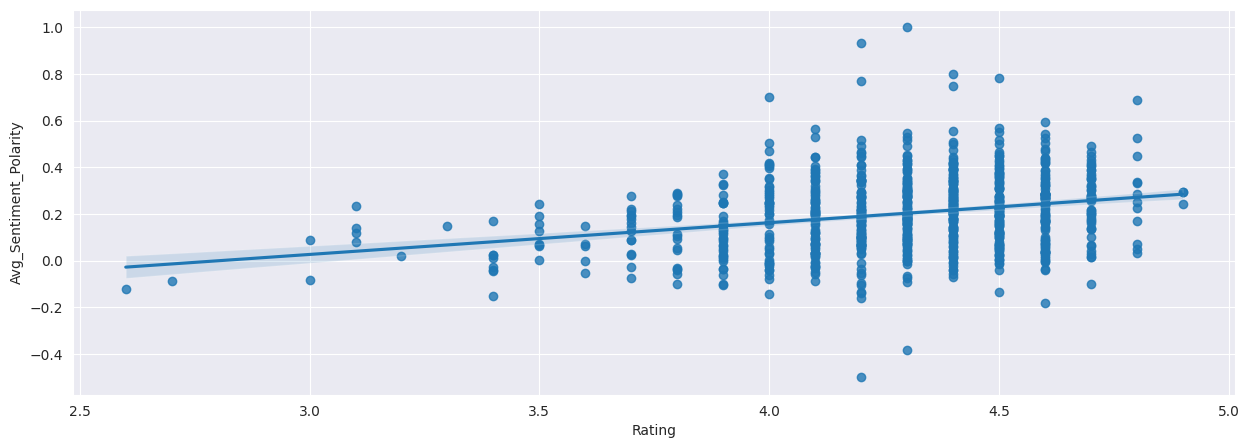

In [ ]:
#plot the rating and sentiment polarity in regression plot
plt.figure(figsize=(15,5))
sns.regplot(x='Rating',y='Avg_Sentiment_Polarity',data=df3)

In [ ]:
#correlation between data
df3.corr()

<ipython-input-167-75fd4920a42d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Rating,Reviews,Size,Installs,Price,Avg_Sentiment_Polarity
Rating,1.000000,0.076816,0.063124,0.026817,-0.010814,0.264053
Reviews,0.076816,1.000000,0.298143,0.466553,-0.015105,-0.123308
Size,0.063124,0.298143,1.000000,0.157051,-0.005029,-0.327188
Installs,0.026817,0.466553,0.157051,1.000000,-0.018925,-0.108549
Price,-0.010814,-0.015105,-0.005029,-0.018925,1.000000,0.023645
Avg_Sentiment_Polarity,0.264053,-0.123308,-0.327188,-0.108549,0.023645,1.000000


<ipython-input-168-c8e1b1a479d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(),annot=True)


Text(0.5, 1.0, 'play store and user reviews data')

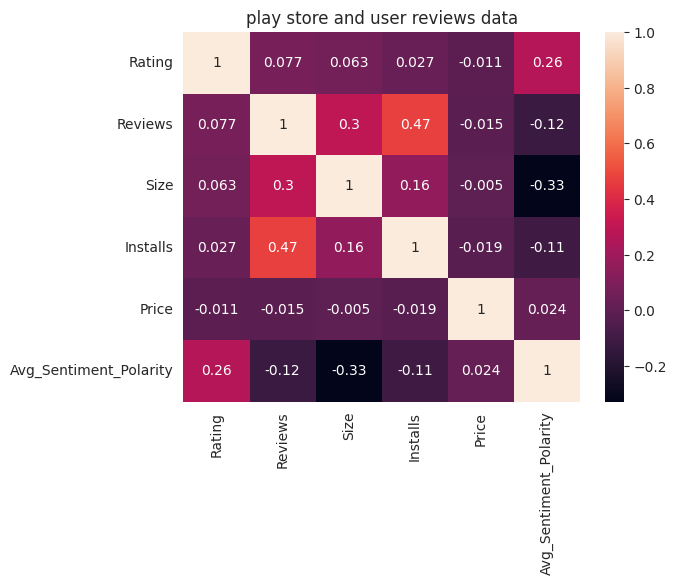

In [ ]:
#heatmap
sns.heatmap(df3.corr(),annot=True)
plt.title('play store and user reviews data')

####As we can see, the 'Rating' and the 'avg_sentiment_polarity' have a positive correlation. Therefore, as the number of average sentiment polarities increases, the rating will also increase.

#**Conclusion**:-

####Based on the two sets of data, we were able to gather a lot of information. For example, we find that the most frequently downloaded categories are game, communication, and tool." Also, the most downloaded genres are communication, tools, and productivity. Based on this data, we can decide which category and genre are best suited for developing a new application. We can focus our efforts on the categories and genres that have been most successful in the past and use this data as a basis for decision-making when developing a new application. We can also use this data to understand which categories and genres our target audience is most likely to engage with. Ultimately, this data allows us to make more informed decisions when it comes to developing a new application.
####We should consider these points when developing a new application.
* The most downloaded categories are communication, video players, social, and productivity, but there are only a limited number of applications in these categories, so we can choose these categories.
* Most users prefer free applications (99.92%).
* The sentiment polarity affects the rating, and the rating affects the number of installations.
* Category with the most app installations: -GAME
* Average price of a paid app: 1–10 dollars
* Most-installed paid app: Minecraft; Hitman: Sniper (10M+)
* Most installed free apps: 20 apps (1 billion)
* Average app rating: recommended over 4 stars
* Most popular content rating: everyone (69.45%)
* Most popular category for paid apps: -GAME
Installs, ratings, and size have a positive correlation.
* Helix Jump has the most positive ratings, and Angry Birds Classic has the most negative ratings.
*Highest number of ratings: Facebook

##**Overview:-**
####I selected Play Store data for our project. We have two data sets: play store data and user reviews data, where the play store data set contains Apps information like category, reviews,Rating,genres,size, installs,price, type,last update,android version,current version, and user reviews data set contain app reviews information like sentiment. Sentiment polarity and sentiment subjectivity
####Before beginning any kind of analysis, it is very important to observe the data set.what features we have given What is the meaning of the features? how we can use them. After a quick observation, we converted our dataset into data. frame and checked whether our data was clean or not. Our dataset is pretty much cleaner, except for some missing values in some columns. The dataset has 10841 rows and 13 columns.
####but in the second data set, we have 64294 rows and 5 columns. This data set contains a large number of null values, which we determined could not be filled.so we removed these null values.
##**Challenges:-**
*   Except for the Rating column, the majority of the data in the Play Store is clean. The rating column has 1470 NaN values, which are approximately 14% of the entire dataset.
*   In user reviews, the data set has 26868 rows with null values. which are approximately 42% of the entire dataset.


##**Conclusion**:-
####Based on the two sets of data, we were able to gather a lot of information. For example, we find that the most frequently downloaded categories are game, communication, and tool." Also, the most downloaded genres are communication, tools, and productivity. Based on this data, we can decide which category and genre are best suited for developing a new application. We can focus our efforts on the categories and genres that have been most successful in the past and use this data as a basis for decision-making when developing a new application. We can also use this data to understand which categories and genres our target audience is most likely to engage with. Ultimately, this data allows us to make more informed decisions when it comes to developing a new application.
####We should consider these points when developing a new application.
* The most downloaded categories are communication, video players, social, and productivity, but there are only a limited number of applications in these categories, so we can choose these categories.
* Most users prefer free applications (99.92%).
* The sentiment polarity affects the rating, and the rating affects the number of installations.
* Category with the most app installations: -GAME
* Average price of a paid app: 1–10 dollars
* Most-installed paid app: Minecraft; Hitman: Sniper (10M+)
* Most installed free apps: 20 apps (1 billion)
* Average app rating: recommended over 4 stars
* Most popular content rating: everyone (69.45%)
* Most popular category for paid apps: -GAME
Installs, ratings, and size have a positive correlation.
* Helix Jump has the most positive ratings, and Angry Birds Classic has the most negative ratings.
*Highest number of ratings: Facebook